## Unidad 1: Tarea práctica

<h5> Aprender distintos modelos de clasificación capaz de clasificar nuevos datos del SDSS en tres clases: estrella, galaxia o quasar</h5>

### Dataset

El dataset Sloan Digital Sky Survey DR14 (https://www.sdss.org/dr14/) contiene 10.000
observaciones del espacio tomadas por el SDSS (https://www.sdss.org/). Cada observación es
descrita por 17 columnas de características y una columna de clase que la identifica como una
estrella, galaxia o quasar. Los datos del SDSS están descritas por características obtenidos por varias
mediciones de espectros ópticos y infrarrojos.

## Desarrollo de la tarea práctica

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sdss = pd.read_csv("SDSS-DR14.csv")
sdss

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


### Descripción de los datos

Descripción de que representa cada columna

-  **_objid_**: Id del objeto 
-  **_ra_**: Ascensión en grados 
-  **_dec_**: Declinación en grados 
-  **_u, g ,r i z_**: Intesidades del espectro ultravioleta, verde, rojo, infrarojo e infrarojo lejano
-  **_run_**: Núnero de escaneo
-  **_rerun_**: tipo de escaneo
-  **_camcol_**: Es la salida de una columna de cámara de ccd como parte de un run
-  **_field_**: Parte del camcol que es procesado por el pohto pipeline
-  **_specobjib_**: Una identificación única de 64 bits codificada en bits utilizada para objetos espectroscópicos ópticos
-  **_class_**: Tipo de objeto astronomico obsevado (star, galaxy, quasar)
-  **_redshift_**: Una medida de velocidad de una galaxia u otro objeto del cielo
-  **_plate_**: Id de la placa de utilizada en la captura
-  **_mjd_**: Fecha Juiliana modificada, utilizada para indicar la fecha en que se tomo una determinada pieza de datos sdss (imagen o espectro)
-  **_fiberid_**: Cada objeto tiene asignado un id de fibra correspondiente

Los siguientes atributos del dataset no describen carasterísticas del objeto observado por el telescopio
  - `objid, ra, dec, run, rerun, camcol, field, specobjid, plate, mjd, fiberid`

Por lo que para nuestros modelos de clasificación que queremos entrenar, no tienen importancia. En consecuencia, se eliminan estas columnas del dataset </br>

In [3]:
sdss.drop(['objid', 'ra', 'dec', 'run', 'rerun','camcol', 
           'field', 'specobjid', 'plate', 'mjd', 'fiberid'], axis=1, inplace=True)

In [4]:
sdss.head()

,u,g,r,i,z,class,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590


#### ¿Faltan datos en el dataset?

In [5]:
sdss.isnull().sum()

u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
dtype: int64

Se puede facilmente comprobar que para cada columna de este dataset no faltan datos

In [6]:
sdss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   u         10000 non-null  float64
 1   g         10000 non-null  float64
 2   r         10000 non-null  float64
 3   i         10000 non-null  float64
 4   z         10000 non-null  float64
 5   class     10000 non-null  object 
 6   redshift  10000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


Notamos que casi todas las columnas son de tipos numericos, menos la columna class la cual es la objetivo

#### Correlación entre las atributos que describen los objetos observados

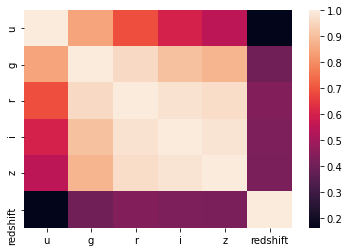

In [7]:
sb.heatmap(sdss.corr())

In [8]:
sdss.corr()

,u,g,r,i,z,redshift
u,1.000000,0.849232,0.692379,0.602630,0.551483,0.163741
g,0.849232,1.000000,0.958106,0.907419,0.879622,0.407576
r,0.692379,0.958106,1.000000,0.977672,0.969197,0.441080
i,0.602630,0.907419,0.977672,1.000000,0.981507,0.431450
z,0.551483,0.879622,0.969197,0.981507,1.000000,0.424034
redshift,0.163741,0.407576,0.441080,0.431450,0.424034,1.000000


Se puede ver a priori que no existe una alta correlacion entre los diferentes tipos de carasteristicas

#### Equilibrio del dataset

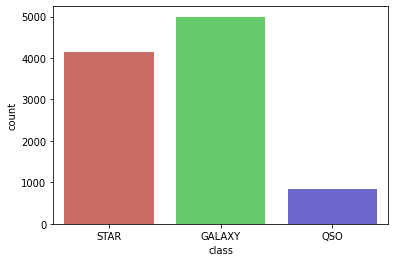

In [9]:
sb.countplot(x='class',data=sdss, palette='hls')

La conclución que se puede hacer mirando el gráfico anterior, el que nos nuestra la distribucion total de cada tipo de clase en el dataset es que no esta equilibrado. Es facil darse cuenta que los quasar tienen aproximadamente unos 1000 mediciones, lo que representa casi un 10% del total. Por otro lado, tanto las galaxias como las extrella tienen aproximadamente un 50% y 40% de los datos respectivamente. Esto estos porcentaje nos dicen que en los diferentes modelos de clasificación que utilizaremos mas adelante, las predicciones de los quasar pueden verse pejudicadas. A pesar de esto, este desequilibrio no es tan significante como para que los modelos no sean aceptables.

#### División de los datos. X e y
Para utilizar los datos de nuestro dataset, dividimos los datos en X (carasterísticas) e y (objetivo)

In [10]:
X = sdss.iloc[:, 0:7]   #7
X.drop(['class'], axis=1, inplace=True)
y = sdss.iloc[:,5]   #5

#### División de los datos. Train y Test

Para la división de los datos utilizaremos un 70% de estos para el aprendizaje y el otro 30% se utilizara para las pruebas

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

#### Escalamiento de los datos
Como las escalas en la cual se manajan los datos de las diferentes carasteristicas (columnas) son muy diferentes, entonces se escalan los datos para obtener mejores resultados en los diferentes modelos que se utilizaran.

In [12]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Aplicando modelos de clasificación de  Sklearn
#### Para esta tarea se utilizarán los siguientes modelos de clasificación:

1- Logistic Regression (multinomial) <br/>
2- Linear Support Vector (svc)<br/>
3- Decision Trees

# 1- Logistic Regression

In [13]:
LogReg = LogisticRegression(multi_class='multinomial', max_iter=200)
LogReg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicciones del modelo

Utilizamos los datos de prueba para hacer las predicciones

In [14]:
y_pred = LogReg.predict(X_test_scaled)

#### Presición del modelo
Despues de hacer prediciones en el modelo, comparamos los resultados con los valores reales y calculamos la presion del modelo

In [15]:
print(accuracy_score(y_test, y_pred))

0.9703333333333334


Este modelo de regresión logística tiene una presición de 0.975, lo cual es muy bueno

#### Precision y Recall

In [16]:
confusion_matrix(y_test, y_pred)

array([[1400,    4,   49],
       [  20,  227,    0],
       [  14,    2, 1284]])

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.96      0.97      1453
         QSO       0.97      0.92      0.95       247
        STAR       0.96      0.99      0.98      1300

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



En general tanto la **_precsion_** como el **_recall_** nos dan valores muy buenos para las tres clases, sobre 0.95. El único valor que es un poco más bajo es el recall de QSO el cual es 0.92 y esto se podría explicar con el bajo número de ejemplos (10%) para esta objeto astronómico como vimos anteriormente. En síntesis, podemos decir que el modelo es muy bueno dado esto valores de parametros de evaluación del modelo.

#### Análisis de las carasterísticas más importante para la clasificación
Para esto, se obtienen los coeficientes de las carasterísticas por cada clase

In [18]:
coefficients = pd.DataFrame({"Carasterísticas":X.columns,
                             "coef class {}".format(LogReg.classes_[0]):LogReg.coef_[0],
                             "coef class {}".format(LogReg.classes_[1]):LogReg.coef_[1],
                             "coef class {}".format(LogReg.classes_[2]):LogReg.coef_[2]})
coefficients

,Carasterísticas,coef class GALAXY,coef class QSO,coef class STAR
0,u,0.627947,-2.500501,1.872554
1,g,-0.684220,3.747798,-3.063578
2,r,1.264994,1.404288,-2.669282
3,i,-0.427153,-0.365679,0.792832
4,z,-1.256815,-2.062918,3.319733
5,redshift,8.304131,11.111578,-19.415708


Text(0.5, 0.98, 'Coeficientes de las carasteristícas por cada clase')

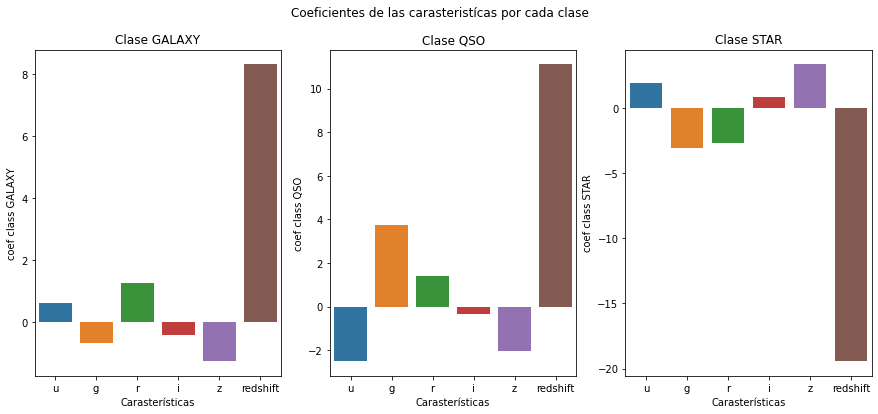

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))
sb.barplot(x='Carasterísticas', y='coef class GALAXY', data=coefficients, ax=axs[0]).set_title('Clase GALAXY')
sb.barplot(x='Carasterísticas', y='coef class QSO', data=coefficients, ax=axs[1]).set_title('Clase QSO')
sb.barplot(x='Carasterísticas', y='coef class STAR', data=coefficients, ax=axs[2]).set_title('Clase STAR')
fig.suptitle('Coeficientes de las carasteristícas por cada clase')


De los gráficos podemos observar que las carasterísticas que más influyen para la clase **_GALAXY_** son `redshift, r y z`, en orden descendente. Por otro lado, la carasterística `i` es la que menos importancia tiene. 

Para la clase **_QSO_** tenemos otra vez a la carasterística `redshift` como la más importante, seguida de `g, u y z`, la menos importante es denuevo `i`.

Por último, la clase **_STAR_** tiene a `redshift, z y g` como las carasterísticas más influyentes, por otro lado `i` sigue siendo la menos importante.

En conclución, se puede decir que para este modelo la carasterística que tiene más importancia en la clasificación para cada una de las clases es `redshift` y la que tiene menos importancia en general es `i`.

# 2- Linear Support Vector 



In [20]:
svc = LinearSVC(random_state=0, tol=1e-5, max_iter=5000)
svc.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=5000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

#### Predicciones del modelo
Utilizamos los datos de prueba para realiaz predicciones con el modelo

In [21]:
y_pred_svc = svc.predict(X_test_scaled)

#### Presición del modelo
Una vez realizadas las prediciones, comparamos los resultados con los valores reales y calculamos la presición de este modelo

In [22]:
print(accuracy_score(y_test, y_pred_svc))

0.9696666666666667


Lapresición de este modelo es de 0.97 aproximadamente, lo que es muy bueno

#### Precisión y Recall

In [23]:
confusion_matrix(y_test, y_pred_svc)

array([[1409,    5,   39],
       [  29,  218,    0],
       [  18,    0, 1282]])

In [24]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97      1453
         QSO       0.98      0.88      0.93       247
        STAR       0.97      0.99      0.98      1300

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



Para este modelo, los valores de **_precision_** son buenos, 0.97 para cada clase aproximadamente. Para el **_recall_** tenemos para las clases GALAXY y STAR valores altos también sobre 0.97, en cambio para QSO baja un poco más 0.88, lo cual tambien es explicable en gran parte por la cantidad de ejemplos (más bajo que las otras clases) utilizada en el entrenamineto. En conclución, tenemos que este modelo es muy bueno dado estos valores.

#### Análisis de los pesos de las carasterísticas por cada clase

In [25]:
coefficientsk = pd.DataFrame({"Carasterísticas":X.columns,"coef class {}".format(svc.classes_[0]):svc.coef_[0],
                                                          "coef class {}".format(svc.classes_[1]):svc.coef_[1],
                                                          "coef class {}".format(svc.classes_[2]):svc.coef_[2]})
coefficientsk        

,Carasterísticas,coef class GALAXY,coef class QSO,coef class STAR
0,u,-0.416609,-0.825570,0.215887
1,g,1.101416,1.245545,-0.321517
2,r,3.393708,0.382493,-0.422873
3,i,-2.193560,-0.131779,0.037735
4,z,-2.221794,-0.656636,0.597438
5,redshift,-0.233588,1.226756,-19.177774


Text(0.5, 0.98, 'Coeficientes de las carasteristícas por cada clase')

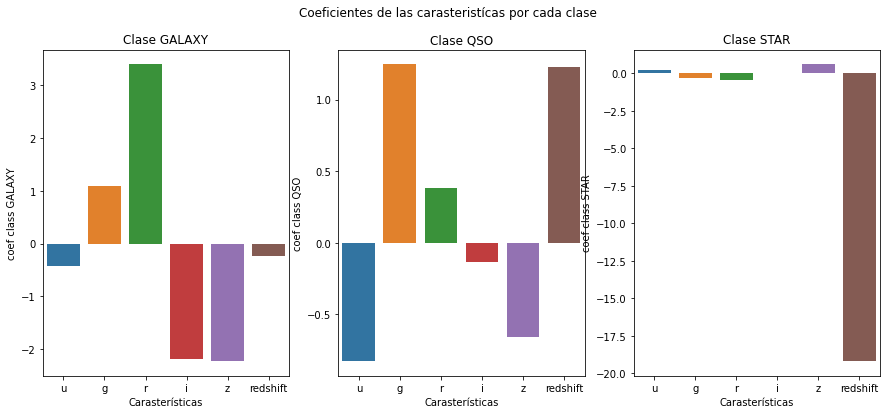

In [26]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))
sb.barplot(x='Carasterísticas', y='coef class GALAXY', data=coefficientsk, ax=axs[0]).set_title('Clase GALAXY')
sb.barplot(x='Carasterísticas', y='coef class QSO', data=coefficientsk, ax=axs[1]).set_title('Clase QSO')
sb.barplot(x='Carasterísticas', y='coef class STAR', data=coefficientsk, ax=axs[2]).set_title('Clase STAR')
fig.suptitle('Coeficientes de las carasteristícas por cada clase')

De los gráficos podemos observar que para la clase **_GALAXY_** la carasterística más importante es `r`, seguida de `z` e `i`. El menos importante es la carasteristica `redshift`.

En tanto, en la clase **_QSO_** las carasterística más importantes son `g`, `redshift` y `u`. La menos importante es la carasterística `i`.

Por último, en la clase **_STAR_** vemos como significativamente la carasterística `redshift` es la más importante en relación a los demás y la `i` casi no tiene aporte.

# 3- Decision Trees

In [27]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

#### Predicciones del modelo

In [28]:
clf_pred=clf.predict(X_test_scaled)

#### Presición de modelo

In [29]:
print(accuracy_score(y_test, clf_pred))

0.9866666666666667


La presición es bastante buena, 0.9856.

#### Precision y recall

In [30]:
print(confusion_matrix(y_test, clf_pred))

[[1439   12    2]
 [  18  229    0]
 [   6    2 1292]]


In [31]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.99      1453
         QSO       0.94      0.93      0.93       247
        STAR       1.00      0.99      1.00      1300

    accuracy                           0.99      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.99      0.99      0.99      3000



En este modelo tenemos que tanto para la **_precision_** como **_recall_** los valores casi perfectos para las clases GALAXY y STAR. En cuanto a la clase QSO, nos dan valores 0.93 para las 2 medidas, los cual esta bastente bien y esta baja sería explicada por la baja cantidad de ejemplos en comparación con las otras 2 clases. En conclución, el modelo es muy bueno de acuerdo a estos parametro de medición de rendimiento.

##### Análisis de las carastetísticas mas importante

In [32]:
coef_tree=pd.DataFrame({"Carasteristicas":X.columns,"Coeficientes":clf.feature_importances_})
coef_tree

,Carasteristicas,Coeficientes
0,u,0.010137
1,g,0.006646
2,r,0.001428
3,i,0.003811
4,z,0.002960
5,redshift,0.975019


Text(0.5, 1.0, 'Importancia de las carasteristica en la clasificacion')

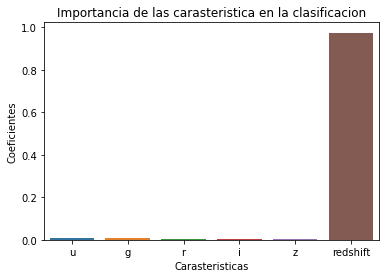

In [33]:
sb.barplot(x='Carasteristicas', y='Coeficientes', data=coef_tree).set_title('Importancia de las carasteristica en la clasificacion')

Para este modelo de clasificación tenemos que la carasteristíca más importante es significativamente `redshift`, por otro lado en escalas más pequeñas tenemos que las otras carasterísticas más importante son `u` y `g`. La menos importante es `r`.


# Concluciones

Una vez visto como es el rendimiento de estos modelos de clasificación, podemos concluir que los 3 modelos son bastante buenos general de acuerdo a las metricas de evaluación utilizadas. Por otro lado tenemos que la carasterística `redshift` se alza como la más importante en estos modelos a la hora de clasificar. 

En cuanto al leve desequilibrio del dataset con los bajos ejemplos del objeto astronómico **_QUASAR_**, se noto una leve baja en las medidas arrojadas por las métricas utilizadas para clasificar es objeto en comparación a los otros tipos. Aún asi, estos resultados no fueron significante como que los modelos general no fueran bastantes aceptables.

En cuanto a posibles desvenjas de los modelos, para **_Decision Tree_** tenemos que depende sustancialmente de una carasterística en sus predicciones, lo cual podría se perjudicial en ciertos casos. Lo mismo para **_SVC_**, pero solo para la clasificación de **_STAR_**. En relación a posibles ventajas, para **_Decision Tree_** si tubieramos un dataset completamente equilibrado, quizás el modelo de clasificación sería casi perfecto en cuanto a sus prediciones. 